# Módulo 5 - Técnicas de Programação II | Python

## Projeto Final - História das Olimpíadas

Este projeto consiste em uma análise de dados históricos dos jogos olímpicos.

Utilize qualquer uma das bibliotecas estudadas (```matplotlib```, ```seaborn``` e ```plotly```) para realizar as atividades propostas. Não há problema em usar apenas uma para realizar todas as atividades, nem em utilizar cada uma delas em uma atividade diferente - siga suas preferências pessoais!

Utilize os (muitos) parâmetros permitidos por cada função e/ou atributos dos objetos fornecidos pelas bibliotecas para criar uma identidade visual coesa para ser utilizada em todo o projeto. Use títulos, legendas e rótulos nos eixos para deixar os gráficos verdadeiramente informativos. E não se esqueça que a simples escolha das cores a serem utilizadas pode tornar os gráficos ainda mais interessantes!

## Metadados:

O arquivo ```athlete_events.csv``` contém 271116 linhas e 15 colunas. Cada linha corresponde a um indivíduo (atleta) que competiu em um evento olímpico individual. Veja a descrição das 15 colunas, a seguir:

- **ID:** Valor único para cada atleta
- **Name:** Nome do atleta
- **Sex:** Gênero do atleta (M para masculino e F para feminino)
- **Age:** Idade do atleta no momento da competição
- **Height:** Altura do atleta, em centímetros
- **Weight:** Peso do atleta, em kg
- **Team:** Nome do time
- **NOC:** National Olympic Committee (código de 3 letras)
- **Games:** Ano e temporada dos jogos
- **Year:** Ano dos jogos
- **Season:** Temporada dos jogos (summer para verão e winter para inverno)
- **City:** Cidade em que ocorreu os jogos
- **Sport:** Esporte praticado pelo atleta
- **Event:** Categoria/modalidade da competição
- **Medal:** Medalha adquirida: Gold (ouro), Silver (prata), Bronze ou NA

Fazendo os imports básicos para o projeto:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline


Verificando os dados do *dataset*

In [2]:
dataset = pd.read_csv('data/athlete_events.csv')

dataset

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [3]:
dataset['NOC'].unique()

array(['CHN', 'DEN', 'NED', 'USA', 'FIN', 'NOR', 'ROU', 'EST', 'FRA',
       'MAR', 'ESP', 'EGY', 'IRI', 'BUL', 'ITA', 'CHA', 'AZE', 'SUD',
       'RUS', 'ARG', 'CUB', 'BLR', 'GRE', 'CMR', 'TUR', 'CHI', 'MEX',
       'URS', 'NCA', 'HUN', 'NGR', 'ALG', 'KUW', 'BRN', 'PAK', 'IRQ',
       'UAR', 'LIB', 'QAT', 'MAS', 'GER', 'CAN', 'IRL', 'AUS', 'RSA',
       'ERI', 'TAN', 'JOR', 'TUN', 'LBA', 'BEL', 'DJI', 'PLE', 'COM',
       'KAZ', 'BRU', 'IND', 'KSA', 'SYR', 'MDV', 'ETH', 'UAE', 'YAR',
       'INA', 'PHI', 'SGP', 'UZB', 'KGZ', 'TJK', 'EUN', 'JPN', 'CGO',
       'SUI', 'BRA', 'FRG', 'GDR', 'MON', 'ISR', 'URU', 'SWE', 'ISV',
       'SRI', 'ARM', 'CIV', 'KEN', 'BEN', 'UKR', 'GBR', 'GHA', 'SOM',
       'LAT', 'NIG', 'MLI', 'AFG', 'POL', 'CRC', 'PAN', 'GEO', 'SLO',
       'CRO', 'GUY', 'NZL', 'POR', 'PAR', 'ANG', 'VEN', 'COL', 'BAN',
       'PER', 'ESA', 'PUR', 'UGA', 'HON', 'ECU', 'TKM', 'MRI', 'SEY',
       'TCH', 'LUX', 'MTN', 'CZE', 'SKN', 'TTO', 'DOM', 'VIN', 'JAM',
       'LBR', 'SUR',

In [4]:
dataset[dataset['NOC']=='BRA']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
665,386,Alexandre Abeid,M,22.0,194.0,92.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Volleyball,Volleyball Men's Volleyball,NaN
666,386,Alexandre Abeid,M,26.0,194.0,92.0,Brazil,BRA,1976 Summer,1976,Summer,Montreal,Volleyball,Volleyball Men's Volleyball,NaN
668,388,Abel Carlos da Silva Braga,M,19.0,190.0,73.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
781,451,Diana Monteiro Abla,F,21.0,175.0,75.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Water Polo,Water Polo Women's Water Polo,NaN
1005,565,Glauclio Serro Abreu,M,26.0,185.0,75.0,Brazil,BRA,2004 Summer,2004,Summer,Athina,Boxing,Boxing Men's Middleweight,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268652,134400,"Maria Jos ""Zz"" Bertolotti",F,26.0,190.0,NaN,Brazil,BRA,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Women's Basketball,NaN
269745,134976,Sieglinda Lenk Zigler,F,17.0,NaN,NaN,Brazil,BRA,1936 Summer,1936,Summer,Berlin,Swimming,Swimming Women's 100 metres Backstroke,NaN
269899,135037,Moacir Zimmermann,M,32.0,184.0,70.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 20 kilometres Walk,NaN
270478,135289,Zzimo Alves Calazans,M,20.0,NaN,NaN,Brazil,BRA,1952 Summer,1952,Summer,Helsinki,Football,Football Men's Football,NaN


## O Brasil nas olímpiadas

**1.** Crie um DataFrame contendo apenas informações sobre atletas **brasileiros**. Exiba a quantidade de linhas desse novo DataFrame.

In [5]:
br_df = dataset[dataset['NOC']=='BRA']

br_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
665,386,Alexandre Abeid,M,22.0,194.0,92.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Volleyball,Volleyball Men's Volleyball,NaN
666,386,Alexandre Abeid,M,26.0,194.0,92.0,Brazil,BRA,1976 Summer,1976,Summer,Montreal,Volleyball,Volleyball Men's Volleyball,NaN
668,388,Abel Carlos da Silva Braga,M,19.0,190.0,73.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
781,451,Diana Monteiro Abla,F,21.0,175.0,75.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Water Polo,Water Polo Women's Water Polo,NaN
1005,565,Glauclio Serro Abreu,M,26.0,185.0,75.0,Brazil,BRA,2004 Summer,2004,Summer,Athina,Boxing,Boxing Men's Middleweight,NaN


Descrevendo o DataFrame:

In [6]:
rows_and_cols, col_description = br_df.shape, br_df.columns

print(f'O dataframe tem o seguinte formato (linhas x colunas): {rows_and_cols}\nColunas do dataframe: {col_description}')

O dataframe tem o seguinte formato (linhas x colunas): (3848, 15)
Colunas do dataframe: Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')


**2. Será que existe alguma correlação entre a altura do atleta e seu desempenho, para algum esporte? Faça essa análise separadamente para cada gênero, e conclua.**

Gere um ou mais gráficos de sua escolha, em que seja possível comparar as alturas dos atletas de cada esporte, separando-os por gênero. Se necessário, crie colunas ou DataFrames auxiliares.

**Facilitador:** se quiser, analise apenas os esportes em que se tenha ao menos 5 atletas medalhistas e 5 atletas não medalhistas, para facilitar visualizações e conclusões.

Criando uma coluna de "Sim" e "Não" para quem obteve medalhas ou não:

In [7]:
br_df['Medalist'] = br_df['Medal'].fillna(0)
br_df['Medalist'] = br_df['Medalist'].replace({0:'Não', 'Bronze':'Sim', 'Silver':'Sim', 'Gold':'Sim'})
br_df['Medalist'] = pd.Categorical(br_df['Medalist'], ['Sim', 'Não'], ordered=True)

br_df.head(10);

/tmp/ipykernel_49646/3769625878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  br_df['Medalist'] = br_df['Medal'].fillna(0)
/tmp/ipykernel_49646/3769625878.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  br_df['Medalist'] = br_df['Medalist'].replace({0:'Não', 'Bronze':'Sim', 'Silver':'Sim', 'Gold':'Sim'})
/tmp/ipykernel_49646/3769625878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

Checando a coluna:

In [8]:
br_df['Medalist'].unique()

['Não', 'Sim']
Categories (2, object): ['Sim' < 'Não']

Agora, vamos criar dois sub-dataframes, um para os atletas homens, outro para os atletas mulheres:

In [9]:
br_df_M = br_df[br_df['Sex'] == 'M']
br_df_F = br_df[br_df['Sex'] == 'F']

Ainda há valores NaN na coluna 'Height'. Como há um número alto de valores não preenchidos (quase 15%), decidimos preencher os NaN's com a mediana dos valores para que o número de dados da análise não seja muito pequeno:

In [10]:
br_df_F['Height']

781       175.0
1668      187.0
1669      187.0
1855      180.0
1856      180.0
          ...  
267755    162.0
267756    162.0
268651    172.0
268652    190.0
269745      NaN
Name: Height, Length: 1148, dtype: float64

Preenchendo os dados:

In [11]:
br_df_M[br_df_M['Height'].isna()] = br_df_M[br_df_M['Height'].isna()].replace(np.nan, br_df_M['Height'].median())
br_df_F[br_df_F['Height'].isna()] = br_df_F[br_df_F['Height'].isna()].replace(np.nan, br_df_F['Height'].median())

/tmp/ipykernel_49646/3951886870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  br_df_M[br_df_M['Height'].isna()] = br_df_M[br_df_M['Height'].isna()].replace(np.nan, br_df_M['Height'].median())
/tmp/ipykernel_49646/3951886870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  br_df_F[br_df_F['Height'].isna()] = br_df_F[br_df_F['Height'].isna()].replace(np.nan, br_df_F['Height'].median())


Por fim, vamos pegar quais esportes tem mais tem medalhas:

In [12]:
br_df_M.groupby('Sport').Medalist.value_counts().unstack()
medalhas = br_df_M.groupby('Sport').Medalist.value_counts().unstack()
medalhas[medalhas['Sim'] > 10]

,Sim,Não
Sport,,
Athletics,25,338
Basketball,34,139
Beach Volleyball,12,12
Football,101,103
Judo,17,61
Sailing,30,123
Swimming,19,368
Volleyball,72,93


Não surpreendentemente, os esportes de maior destaque para o Brasil são os das olimpíadas de verão. Sendo assim, iremos nos limitar a eles para a análise.

In [13]:
summer_sports = ['Athletics', 'Basketball', 'Beach Volleyball', 'Football', 'Judo', 'Sailing', 'Swimming', 'Volleyball']
final_data_M = br_df_M[br_df_M['Sport'].isin(summer_sports)]
final_data_F = br_df_F[br_df_F['Sport'].isin(summer_sports)]

Agora iremos verificar a correlação entre altura x esporte e desempenho:

Text(0.5, 0.98, 'Correlação entre Altura e  Desempenho Esportivo (Masculino)')

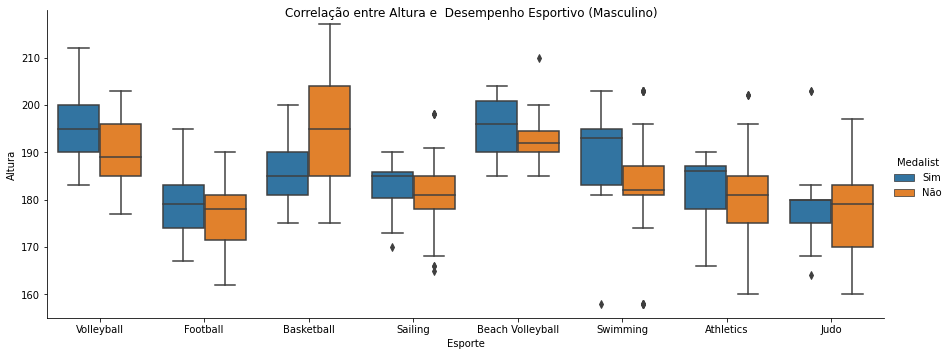

In [14]:
g = sns.catplot(data=final_data_M,
            x='Sport',
            y='Height',
            hue='Medalist',
            kind='box',
            aspect=2.5)

g.set_axis_labels("Esporte", "Altura")
g.fig.suptitle('Correlação entre Altura e  Desempenho Esportivo (Masculino)')

Text(0.5, 0.98, 'Correlação entre Altura e  Desempenho Esportivo (Feminino)')

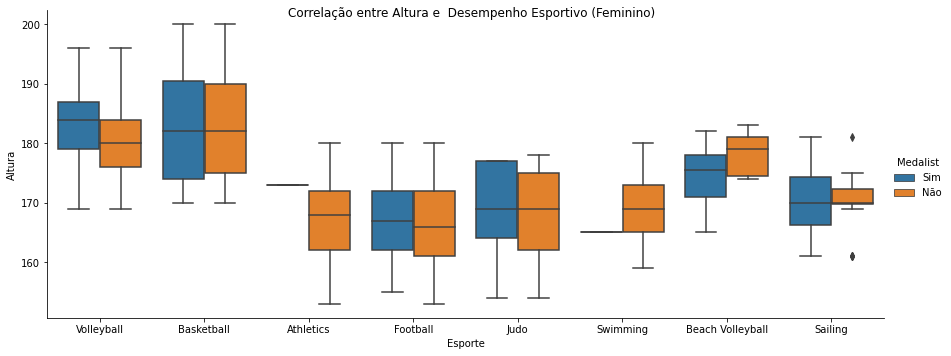

In [15]:
f = sns.catplot(data=final_data_F,
            x='Sport',
            y='Height',
            hue='Medalist',
            kind='box',
            aspect=2.5)

f.set_axis_labels("Esporte", "Altura")
f.fig.suptitle('Correlação entre Altura e  Desempenho Esportivo (Feminino)')

### Comparando por heatmap

In [16]:
# Redefinindo a coluna Medal para categoria (0: não tem medalha, 1: tem medalha)

br_df_M['Medal'] = br_df_M['Medal'].fillna(0)
br_df_M['Medal'] = br_df_M['Medal'].replace({'Bronze': 1, 'Silver': 1, 'Gold': 1})
br_df_M['Medal'] = pd.Categorical(br_df_M['Medal'], [0, 1])

br_df_F['Medal'] = br_df_F['Medal'].fillna(0)
br_df_F['Medal'] = br_df_F['Medal'].replace({'Bronze': 1, 'Silver': 1, 'Gold': 1})
br_df_F['Medal'] = pd.Categorical(br_df_F['Medal'], [0, 1])

/tmp/ipykernel_49646/1805546886.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  br_df_M['Medal'] = br_df_M['Medal'].fillna(0)
/tmp/ipykernel_49646/1805546886.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  br_df_M['Medal'] = br_df_M['Medal'].replace({'Bronze': 1, 'Silver': 1, 'Gold': 1})
/tmp/ipykernel_49646/1805546886.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [17]:
# Agrupando a quantidade de medalhas por modalidade e altura

br_df_M = br_df_M[['Sport', 'Height', 'Medal']]
M_medals = br_df_M[br_df_M['Medal'] == 1].groupby(['Sport', 'Height']).Medal.count().unstack().fillna(0)


br_df_F = br_df_F[['Sport', 'Height', 'Medal']]
F_medals = br_df_F[br_df_F['Medal'] == 1].groupby(['Sport', 'Height']).Medal.count().unstack().fillna(0)

In [18]:
M_medals.shape, F_medals.shape

((14, 45), (11, 39))

In [19]:
# Condensando as categorias de altura

# primeiramente criando um novo dataframe
M_heat = pd.DataFrame(M_medals[156.0])
F_heat = pd.DataFrame(F_medals[154.0])

In [20]:
# Preenchendo o novo dataframe com as colunas somadas (de 3 em 3 nesse caso)

for coluna in range(int(len(M_medals.columns)/3)):
    
    if coluna == 0:
        
        M_heat[int((M_medals.columns[coluna] + 
                  M_medals.columns[coluna + 1] + 
                  M_medals.columns[coluna + 2]) / 3)] = (M_medals[M_medals.columns[coluna]] + 
                  M_medals[M_medals.columns[coluna + 1]] + 
                  M_medals[M_medals.columns[coluna + 2]])
 
    else:
        
        M_heat[int(((M_medals.columns[coluna*3] + 
                  M_medals.columns[coluna*3 + 1] + 
                  M_medals.columns[coluna*3 + 2]) / 3))] = (M_medals[M_medals.columns[coluna*3]] + 
                  M_medals[M_medals.columns[coluna*3 + 1]] + 
                  M_medals[M_medals.columns[coluna*3 + 2]])

        
# (o df feminino tem menos categorias de altura, então agrupei de 2 em 2)

for coluna in range(int(len(F_medals.columns)/2)):
    
    if coluna == 0:
        
        F_heat[int((F_medals.columns[coluna] + 
                  F_medals.columns[coluna + 1] + 
                  F_medals.columns[coluna + 2]) / 3)] = (F_medals[F_medals.columns[coluna]] + 
                  F_medals[F_medals.columns[coluna + 1]] + 
                  F_medals[F_medals.columns[coluna + 2]])
 
    else:
        
        F_heat[int(((F_medals.columns[coluna*2] + 
                  F_medals.columns[coluna*2 + 1]) / 2))] = (F_medals[F_medals.columns[coluna*2]] + 
                  F_medals[F_medals.columns[coluna*2 + 1]])

In [21]:
M_heat = M_heat.iloc[:,1:]
F_heat = F_heat.iloc[:,1:]

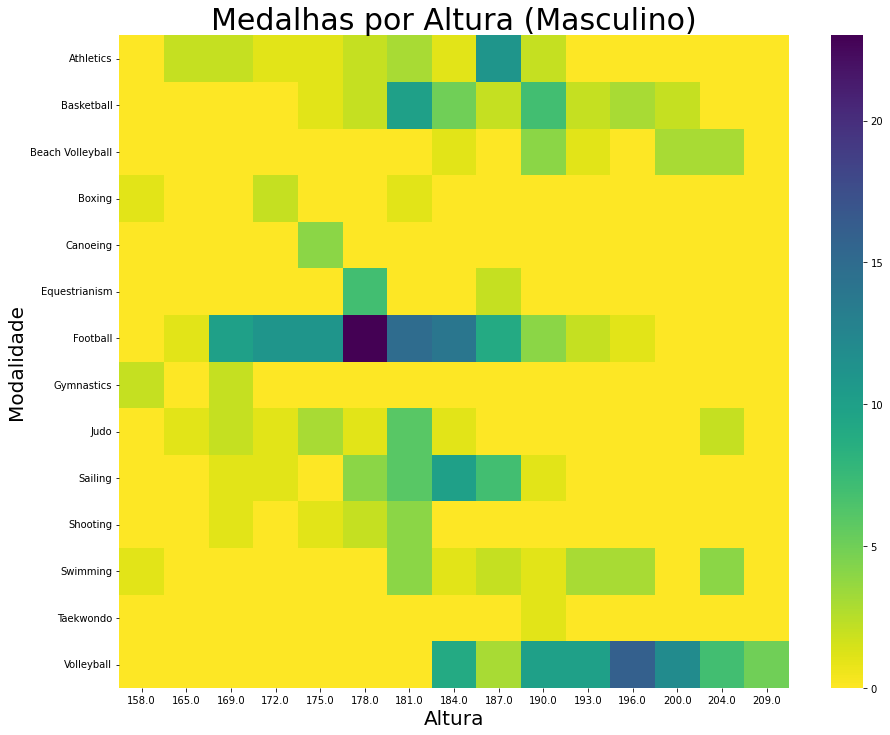

In [22]:
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(M_heat, ax=ax, cmap='viridis_r')

ax.set_xlabel('Altura', size=20)
ax.set_ylabel('Modalidade', size=20)
ax.set_title('Medalhas por Altura (Masculino)', size=30)

plt.show()

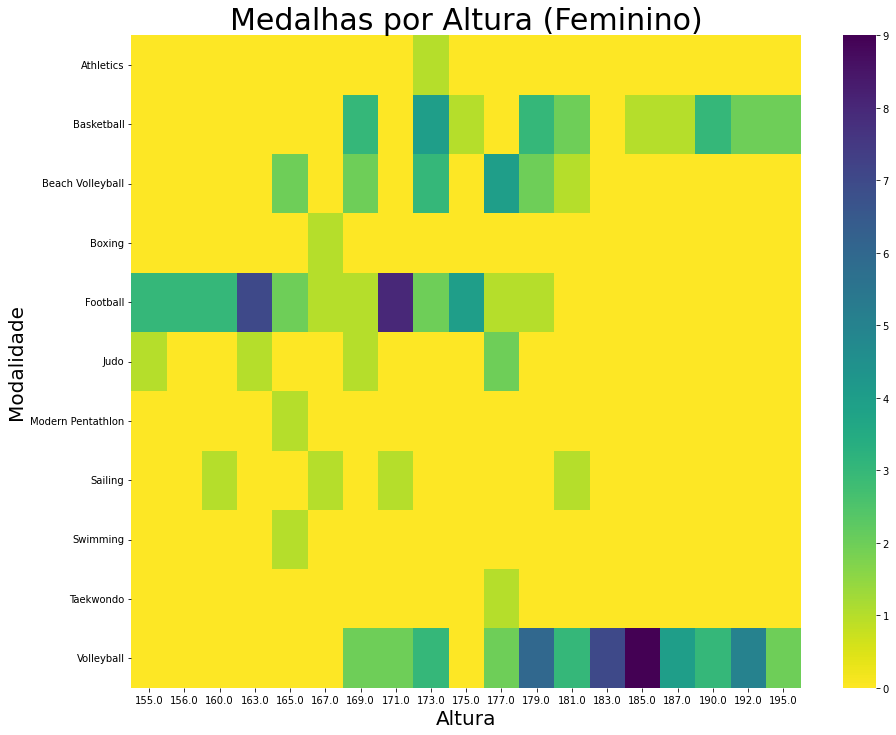

In [23]:
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(F_heat, ax=ax, cmap='viridis_r', square=False)

ax.set_xlabel('Altura', size=20)
ax.set_ylabel('Modalidade', size=20)
ax.set_title('Medalhas por Altura (Feminino)', size=30)

plt.show()

Como curiosidade, vamos ver a distribuição de alturas dos atletas

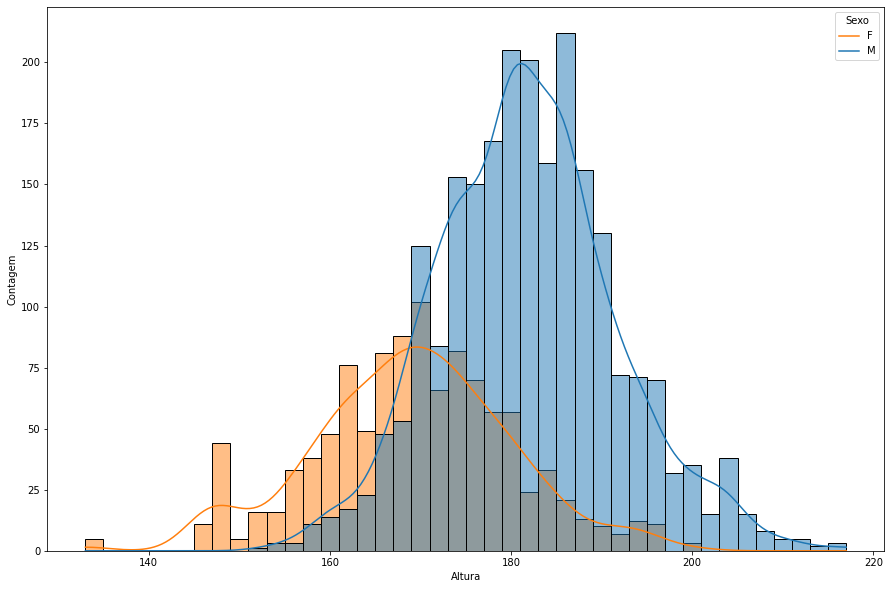

In [24]:
plt.figure(figsize=(15,10))
sns.histplot(data=br_df, x='Height', hue='Sex', kde=True)

plt.xlabel('Altura')
plt.ylabel('Contagem')

plt.legend(['F', 'M'], title='Sexo')

plt.show()

#### Influência da Altura
Não há correlação entre o desempenho dos atletas e o desempenho deles em termos de medalhas obtidas. Mesmo em esportes com altas concentrações de atletas mais altos, como Basquetebol, Voleibol, e Volei de Praia, altura não assegura o desempenho, aliás, a relação é até inversa no caso do Basquetebol Masculino, cuja maioria dos atletas mais altos não obtiveram medalhas. Há a presença de *oultliers* na natação, e no judô, por exemplo, mas a correlação continua a mesma.

#### Influência do Gênero
O gênero apenas influencia na distribuição de alturas, sendo os homens predominantemente maiores que as mulheres, como demonstrado no primeiro gráfico, onde a distribuição de alturas entre atletas masculinos e atletas femininos é distintamente separadada. Curiosamente, a distribuição de atletas de âmbos os gêneros é bimodal - tendo picos em 150cm e 170cm para as mulheres, e 170cm e 190cm para homens.

**3. Vamos analisar agora as medalhas que nossos atletas trouxeram para casa.**

Crie uma visualização de sua preferência para mostrar, por esporte, a proporção de medalhas de ouro, prata e bronze que nosso país já consquistou.

**Facilitador:** Se preferir, mostre as proporções apenas para os 6 esportes que tiveram mais medalhas.  

*DICA:* Cuidado! Esportes em equipe dão medalhas a todos os jogadores, mas só contabilizam uma vez!

In [25]:
# Categorizando a coluna Medal

br_df['Medal'] = br_df['Medal'].fillna(0)
br_df['Medal'] = br_df['Medal'].replace({0: 0, 'Bronze': 1, 'Silver': 2, 'Gold': 3})
br_df['Medal'] = pd.Categorical(br_df['Medal'], [0, 1, 2, 3], ordered=True)

/tmp/ipykernel_49646/2958671212.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  br_df['Medal'] = br_df['Medal'].fillna(0)
/tmp/ipykernel_49646/2958671212.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  br_df['Medal'] = br_df['Medal'].replace({0: 0, 'Bronze': 1, 'Silver': 2, 'Gold': 3})
/tmp/ipykernel_49646/2958671212.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [26]:
medalhistas = br_df[br_df['Medal'] != 0]

In [27]:
# Agrupando a quantidade de medalhas por tipo de medalha.

medalhistas = medalhistas.groupby(['Sport', 'Medal']).Medal.count().unstack()
medalhistas.loc[:,1:]

Medal,1,2,3
Sport,,,
Athletics,14,7,5
Basketball,46,12,0
Beach Volleyball,6,14,6
Boxing,3,1,1
Canoeing,1,3,0
Equestrianism,8,0,1
Football,34,85,17
Gymnastics,1,2,1
Judo,15,3,4


In [28]:
# Criando a proporção de cada categoria de medalha em relação ao total de medalhas da modalidade esportiva
prop = round(medalhistas.div(medalhistas.sum(axis=1), axis=0), 2)

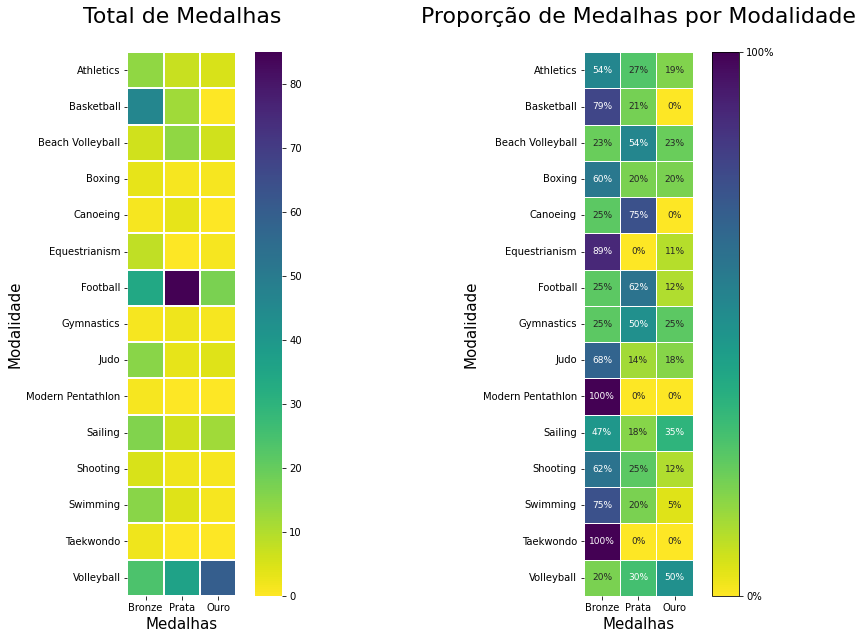

In [29]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))

ax1 = sns.heatmap(medalhistas.loc[:,1:], linewidths=2, ax=ax1, cmap='viridis_r', 
                  square=True, cbar=True)

ax1.set_xticks(ticks = [0.5, 1.5, 2.5], labels=['Bronze', 'Prata', 'Ouro'])
ax1.set_xlabel('Medalhas', size=15)
ax1.set_ylabel('Modalidade', size=15)
ax1.set_title('Total de Medalhas\n', size=22)


ax2 = sns.heatmap(prop.loc[:,1:], linewidths=.5, ax=ax2, cmap='viridis_r', 
                  square=True, cbar=False, annot=True, annot_kws={"fontsize":9})

cbar2 = ax2.figure.colorbar(ax2.collections[0])
cbar2.set_ticks([0, 1])
cbar2.set_ticklabels(["0%", "100%"])

ax2.set_xticks(ticks = [0.5, 1.5, 2.5], labels=['Bronze', 'Prata', 'Ouro'])
ax2.set_xlabel('Medalhas', size=15)
ax2.set_ylabel('Modalidade', size=15)
ax2.set_title('Proporção de Medalhas por Modalidade\n', size=22)
for t in ax2.texts: t.set_text(str(int(float(t.get_text())*100)) + "%")

plt.show()

# obs: se estiver estranho com as anotações, mudar annot para False

**4. Para finalizar a história do Brasil, vamos ver a série temporal de medalhas brasileiras.**

Crie um gráfico de sua escolha, que mostre o total de medalhas de ouro, prata e bronze, por edição da olimpíada (em ordem cronológica). 

*DICA:* Mais uma vez, tome cuidado com os esportes em grupo - os contabilize apenas uma vez!

Mais uma vez, vamos apenas usar as olimpíadas de verão porque o Brasil não tem presença significativa nas olimpíadas de inverno para tornar estes dados relevantes à análise:

Filtrando o dataframe para não haver valores repetidos:

In [49]:
filtered_df = br_df.drop_duplicates(subset=['Year', 'Event'], keep='first')

filtered_df['Medal'] = filtered_df['Medal'].replace({0:None, 1:'Bronze', 2:'Silver', 3:'Gold'})

filtered_df = filtered_df[filtered_df['Medal'].notna()]

/tmp/ipykernel_49646/519182673.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Medal'] = filtered_df['Medal'].replace({0:None, 1:'Bronze', 2:'Silver', 3:'Gold'})


In [50]:
filtered_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Medalist
1651,918,Ademir Roque Kaefer,M,24.0,179.0,74.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Football,Football Men's Football,Silver,Sim
1652,918,Ademir Roque Kaefer,M,28.0,179.0,74.0,Brazil,BRA,1988 Summer,1988,Summer,Seoul,Football,Football Men's Football,Silver,Sim
1668,925,Adenzia Aparecida Ferreira da Silva,F,25.0,187.0,65.0,Brazil,BRA,2012 Summer,2012,Summer,London,Volleyball,Volleyball Women's Volleyball,Gold,Sim
1733,966,Daniel Adler,M,26.0,180.0,72.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Sailing,Sailing Mixed Three Person Keelboat,Silver,Sim
1856,1020,Adriana Aparecida dos Santos,F,25.0,180.0,61.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Basketball,Basketball Women's Basketball,Silver,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212473,106683,Robert Scheidt,M,27.0,188.0,76.0,Brazil,BRA,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Mixed One Person Dinghy,Silver,Sim
212474,106683,Robert Scheidt,M,31.0,188.0,76.0,Brazil,BRA,2004 Summer,2004,Summer,Athina,Sailing,Sailing Mixed One Person Dinghy,Gold,Sim
220065,110549,Rafaela Lopes Silva,F,24.0,169.0,57.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Judo,Judo Women's Lightweight,Gold,Sim
221565,111358,Maicon de Andrade Siqueira,M,23.0,190.0,90.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Men's Heavyweight,Bronze,Sim


Conferindo:

In [51]:
filtered_df['Medal'].value_counts()

Bronze    56
Silver    28
Gold      22
Name: Medal, dtype: int64

In [52]:
medalhas_ouro = filtered_df[['Year', 'Medal']][(filtered_df['Medal'] == 'Gold') & (filtered_df['Season'] == 'Summer')]

medalhas_prata = filtered_df[['Year','Medal']][(filtered_df['Medal'] == 'Silver') & (filtered_df['Season'] == 'Summer')]

medalhas_bronze = filtered_df[['Year','Medal']][(filtered_df['Medal'] == 'Bronze') & (filtered_df['Season'] == 'Summer')]

Criando os valores temporais para as séries das medalhas:

In [53]:
serie_ouro = medalhas_ouro['Year'].value_counts().reset_index(name = 'gold_medals')
serie_prata = medalhas_prata['Year'].value_counts().reset_index(name = 'silver_medals')
serie_bronze = medalhas_bronze['Year'].value_counts().reset_index(name = 'bronze_medals')

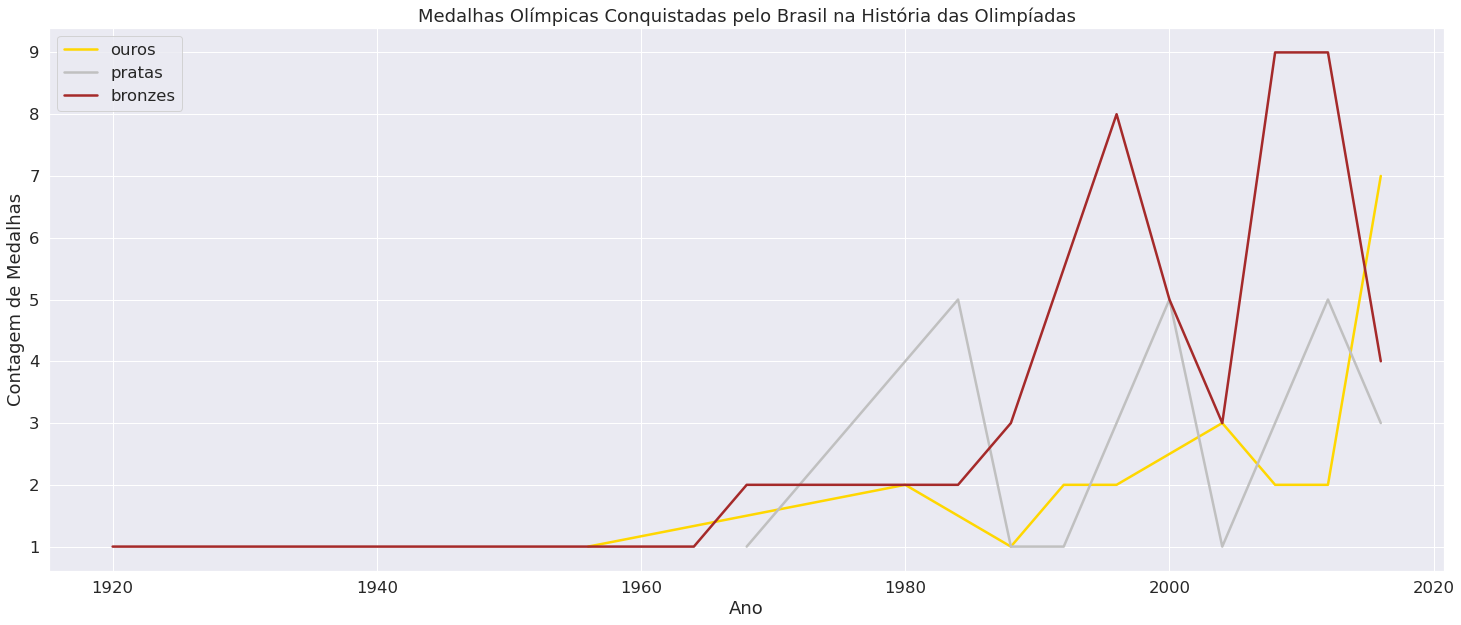

In [54]:
plt.figure(figsize=(25,10))
sns.set_theme(palette=['gold', 'silver', 'brown'])
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

sns.lineplot(x='index', 
             y='gold_medals', 
             legend='full', 
             label='ouros',  
             data=serie_ouro)
sns.lineplot(x='index', 
             y='silver_medals', 
             legend='full', 
             label='pratas',  
             data=serie_prata)
sns.lineplot(x='index', 
             y='bronze_medals', 
             legend='full', 
             label='bronzes', 
             data=serie_bronze)

plt.title('Medalhas Olímpicas Conquistadas pelo Brasil na História das Olimpíadas')
plt.xlabel('Ano')
plt.ylabel('Contagem de Medalhas')
plt.show()

Como podemos ver, desde 1920, o Brasil ganha pelo menos uma medalha de bronze por olimpíada, atingindo um patamar em 2016. Medalhas de prata são incosistentes - com pico se vales, mas nunca ultrapassando o máximo de cinco metalhas. Felizmente, as medalhas de ouro vem em uma tendência crescento positiva, sendo o desempenho mais recente o melhor do país desde todas as outras edições.

**5. Agora é com vocês!** 

Escolha uma análise visual que julga interessante de fazer neste conjunto de dados, faça o(s) gráficos(s) necessários e comente os resultados. 

Distribuição de medalhas de ouro por país:

In [35]:
gmedal_country = dataset[(dataset['Medal'] == 'Gold')]

total_gmedal = gmedal_country['Team'].value_counts().reset_index(name = 'Medal')

total_gmedal

,index,Medal
0,United States,2474
1,Soviet Union,1058
2,Germany,679
3,Italy,535
4,Great Britain,519
...,...,...
237,Israel,1
238,Carabinier-15,1
239,Mozambique,1
240,Belgium-1,1


Como há muitos países com resultados insignificantes, vamos ficar com os que tem mais de 300 medalhas apenas:

In [36]:
three_hundo_medal_club = total_gmedal[(total_gmedal['Medal'] >= 300)]

three_hundo_medal_club

,index,Medal
0,United States,2474
1,Soviet Union,1058
2,Germany,679
3,Italy,535
4,Great Britain,519
5,France,455
6,Sweden,451
7,Hungary,432
8,Canada,422
9,East Germany,369


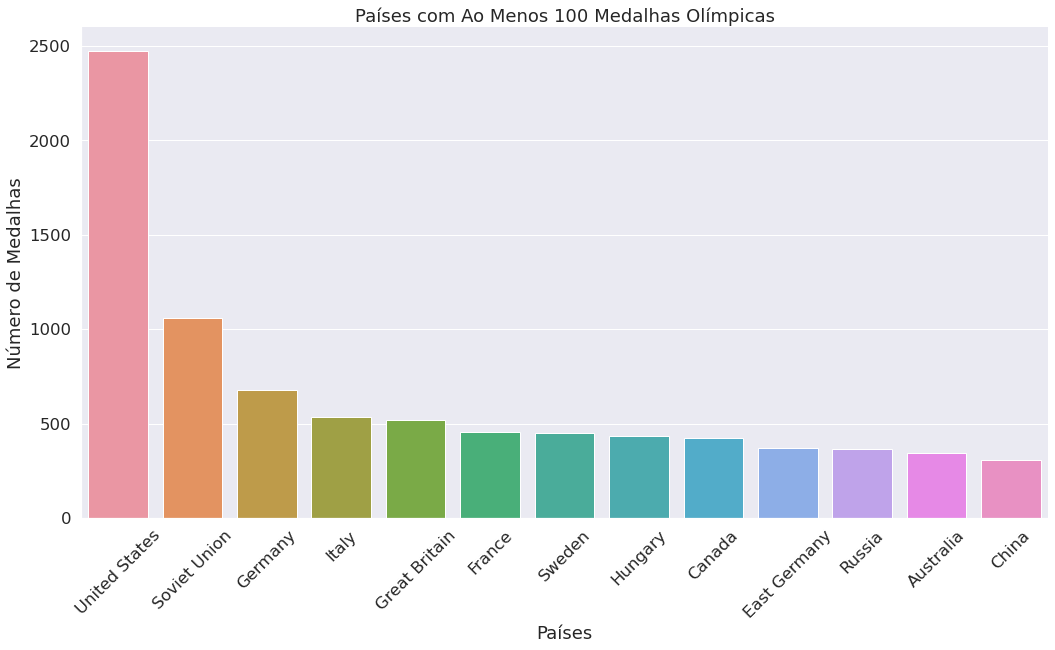

In [37]:
most_medals_plot = sns.catplot(data=three_hundo_medal_club, 
                 x='index', 
                 y='Medal', 
                 kind='bar', 
                 height=8, aspect=15/8)

most_medals_plot.set(xlabel='Países',
       ylabel='Número de Medalhas', 
       title='Países com Ao Menos 100 Medalhas Olímpicas', 
       )

plt.xticks(rotation=45);

Observação: considerando o desempenho olímpico recente da República Popular da China, tem-se a impressão que este dataset não está atualizado.

Uma outra análise visual interessante é ver o aumento de medalhas nas categorias femininas ao longo dos anos.

In [38]:
women_medals = dataset[(dataset['Sex'] == 'F') & (dataset['Season'] == 'Summer')]

women_medals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold


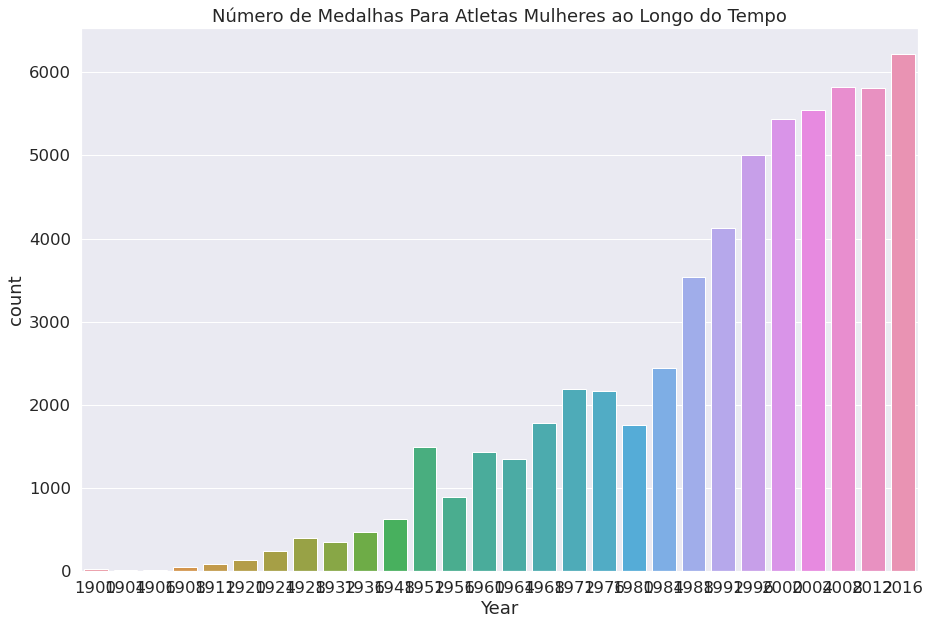

In [39]:
plt.figure(figsize=(15,10))
plt.title('Número de Medalhas Para Atletas Mulheres ao Longo do Tempo')
plt.ylabel('Contagem Total')
fem_olympics = sns.countplot(data=women_medals, x='Year')
plt.show()

Ao ver o crescimento incremental do número de medalhas por atletas mulheres ao longo do tempo, é evidente que a participação feminina nos jogos olímpicos é cada vez maior.

Duas curiosidades: os mergulhos da contagem em 1956 e 1980 provavelmente foram causados pelos boicotes de alguns dos países que iriam aprticipar: 
* Em 1956, em Melbourne, devido so incidente no Canal de Suez e devido à invasão da Hungria pelos soviéticos (https://en.wikipedia.org/wiki/1956_Summer_Olympics#:~:text=Eight%20teams%20boycotted,citation(s)%20needed%5D).

* Em 1980, devido à invasão soviética ao Afeganistão (https://en.wikipedia.org/wiki/1980_Summer_Olympics#:~:text=Led%20by%20the%20United%20States%2C%2066%20countries%20boycotted%20the%20games%20entirely%2C%20because%20of%20the%20Soviet%E2%80%93Afghan%20War.)


Assim, podemos também verificar a proporção de participação de mulheres x homens ao longo do tempo. Para isso, vamos focar só nas olimpíadas de verão que tem um número mais significativo de atletas e que inclui mais países do mundo:

In [40]:
atletas_homens = dataset[['Year', 'Sex']][(dataset['Sex'] == 'M') & (dataset['Season'] == 'Summer')]

atletas_mulheres = dataset[['Year','Sex']][(dataset['Sex'] == 'F') & (dataset['Season'] == 'Summer')]

In [41]:
series_1 = atletas_homens['Year'].value_counts().reset_index(name = 'contagem_masc')

series_2 = atletas_mulheres['Year'].value_counts().reset_index(name = 'contagem_fem')

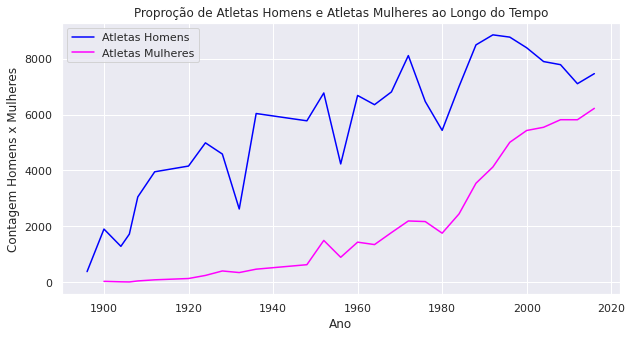

In [42]:
plt.figure(figsize=(10,5))
sns.set_theme(palette=['blue', 'fuchsia'])
sns.lineplot(x='index', 
             y='contagem_masc', 
             legend='full', 
             label='Atletas Homens', 
             data=series_1)
sns.lineplot(x='index', 
             y='contagem_fem', 
             legend='full', 
             label='Atletas Mulheres', 
             data=series_2)

plt.title('Proproção de Atletas Homens e Atletas Mulheres ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Contagem Homens x Mulheres')
plt.show()

Como podemos ver, a proporção de homens é mais flutuante  ao longo do tempo, já a de mulheres é progressivamente maior.